In [1]:
%load_ext autoreload
%autoreload 2
import site
site.addsitedir('../') 

In [2]:
import sganalysiswf as sga

In [7]:
configfile = '/media/cephfs2/userdata/Bullock_group/Lucas/EXP.M20221012/KIF5B p150/config.json'
config = sga.load_config(configfile)
config['mode'] = 0
config['Analysis'] = 'Spread'
config['channels'] = [{'index':0,'name':'nuclei'},{'index':1,'name':'ch2'},{'index':2,'name':'ch3'},{'index':3,'name':'ch4'}]
#fname = '/media/cephfs2/userdata/Bullock_group/Lucas/EXP.M20221012/KIF5B p150/U2OS siCNTRL AS Z Positions_Maximum intensity projection.lsm'
fname = '/media/cephfs2/userdata/Bullock_group/Lucas/EXP.M20221012/KIF5B p150/U2OS siCNTRL CNTRL Z Positions_Maximum intensity projection.lsm'
stats, mip, labels, rois = sga.process_fov_spread(fname, 0, config)

process fov spread
Segmenting images
 - Segmenting cells with mode 0
 - Segmenting nuclei
 - Compute ROI statistics


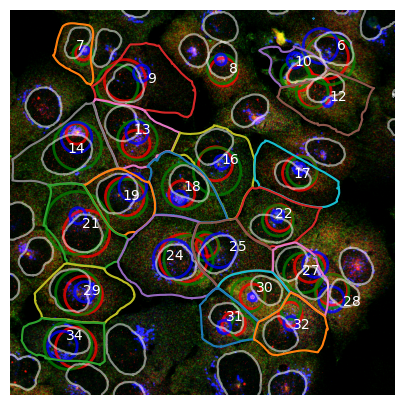

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sga.show_image(mip, labels, rois, stats)

In [ ]:
plt.plot(stat)

In [ ]:
import math
import matplotlib.pyplot as plt
roi = rois[0]
masks, crop_img = sga.compute_roi_masks(roi, labels, mip, border=0)
distances = sga.compute_roi_distance(masks)
stat = sga.measure_roi_stats(roi, crop_img, masks, distances)
s  = sga.spatial_spread_mask(masks['cell'], crop_img['other'])
sga.show_roi(roi, mip, labels, stat)


## Second dataset

In [ ]:
config

In [ ]:
configfile = '/media/cephfs2/userdata/Bullock_group/Lucas/EXP.M20230114/config.json'
#config = json.load(open(configfile))
config['channels'][1]={'index': 3, 'name': 'membrane'}
fname = '/media/cephfs2/userdata/Bullock_group/Lucas/EXP.M20230114/U2OS siCNTRL AS Z Positions_Maximum intensity projection EEA1 KIF.lsm'
stats, mip, labels, rois = sga.process_fov(fname,0,config)
sga.show_image(mip, labels, rois)


In [ ]:
roi=rois[16]
masks, crop_img = sga.compute_roi_masks(roi, labels, mip, border=0)
distances = sga.compute_roi_distance(masks)
stat = sga.measure_roi_stats(roi, crop_img, masks, distances)

plt.imshow(crop_img['granule']+100*masks['cell']+masks['particle'])
sga.spatial_spread(masks['cell'], crop_img['other'])


In [ ]:
from skimage import morphology
from skimage.filters.rank import maximum, minimum
from skimage.filters import gaussian
from timeit import default_timer as timer

# We define a structuring element (flat kernel) with radius 30
selem =  
im = crop_img['granule']
corrected = morphology.white_tophat(im, morphology.disk(10))

def spatial_spread(mask, intensity):
    """Spread as the trace of the moment matrix"""
    import numpy as np
    x,y = np.meshgrid(np.arange(mask.shape[1]), np.arange(mask.shape[0]))
    w = mask * intensity    
    #if (w.max()-w.min()) > 0 :
    #    w = (w - w.min()) / (w.max() - w.min())
    #else:
    #    return 0

    sw = np.sum(w)    
    if sw < 1e-9:
        return 0.0
    sx = np.sum(w * x) / sw
    sy = np.sum(w * y) / sw    
    sxx = np.sum(w * np.square(x-sx)) / sw
    syy = np.sum(w * np.square(y-sy)) / sw
    
    #sxy = np.sum(w * (x-sx) * (y-sy)) / sw
    return np.sqrt(sxx+syy)

tmp =  corrected*(corrected>20)
plt.imshow(tmp * masks['cell'])

spatial_spread(masks['cell']>0, tmp)

